In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from DSEHW import DSELinearClassifier
from plot_decision_regions import plot_decision_regions
%matplotlib inline

In [2]:
seed = 42;

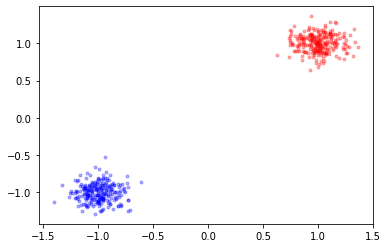

In [3]:
# Well separated blobs

A_sep, y1 = make_blobs(n_samples = 250, centers = [(-1,-1)], 
                       cluster_std = 1/8, random_state = seed)
B_sep, y2 = make_blobs(n_samples = 250, centers = [(1,1)], 
                       cluster_std = 1/8, random_state = seed+1)

y = np.concatenate((np.ones(np.size(A_sep,0)),-1*np.ones(np.size(B_sep,0))))
df_sep = pd.DataFrame({'D1': np.concatenate((A_sep[:,0],B_sep[:,0])),
                       'D2': np.concatenate((A_sep[:,1],B_sep[:,1])),
                       'label' : y})

plt.scatter(A_sep[:,0],A_sep[:,1], marker = '.', c = 'b', alpha = 0.3)
plt.scatter(B_sep[:,0],B_sep[:,1], marker = '.', c = 'r', alpha = 0.3)

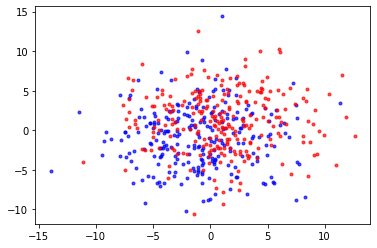

In [4]:
# Not-so-well-separated blobs

A_poor, y1 = make_blobs(n_samples = 250, centers = [(-1,-1)], 
                        cluster_std = 4, random_state = seed)
B_poor, y2 = make_blobs(n_samples = 250, centers = [(1,1)], 
                        cluster_std = 4, random_state = seed+1)

y = np.concatenate((np.ones(np.size(A_poor,0)),-1*np.ones(np.size(B_poor,0))))
df_poor = pd.DataFrame({'D1': np.concatenate((A_poor[:,0],B_poor[:,0])),
                        'D2': np.concatenate((A_poor[:,1],B_poor[:,1])),
                        'label' : y})

plt.scatter(A_poor[:,0],A_poor[:,1], marker = '.', c = 'b', alpha = 0.7)
plt.scatter(B_poor[:,0],B_poor[:,1], marker = '.', c = 'r', alpha = 0.7)

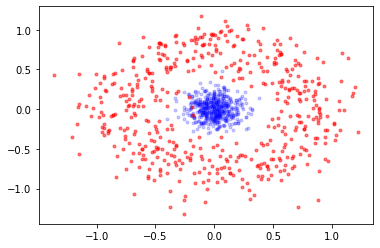

In [5]:
# Circles

x,ind = make_circles(n_samples = (500,500),noise = 0.2, random_state = seed+1)
B_circle = x[ind>0]
A_circle,y = make_blobs(n_samples = 500, centers = [(0,0)], 
                        cluster_std = 1/8, random_state = seed)

y = np.concatenate((np.ones(np.size(A_circle,0)),-1*np.ones(np.size(B_circle,0))))
df_circle = pd.DataFrame({'D1': np.concatenate((A_circle[:,0],B_circle[:,0])),
                          'D2': np.concatenate((A_circle[:,1],B_circle[:,1])),
                          'label' : y})

plt.scatter(A_circle[:,0],A_circle[:,1], marker = '.', c = 'b', alpha = 0.2)
plt.scatter(B_circle[:,0],B_circle[:,1], marker = '.', c = 'r', alpha = 0.5)

In [6]:
"""Applying linear classifiers on two well separated bolbs"""

"Perceptron linear classifier"

ptron = DSELinearClassifier(activation = 'Perceptron',
                         random_state = seed,
                         learning_rate = 0.1)

# Split data and class
y = df_sep.iloc[0:np.size(df_sep,0),2].values
X = df_sep.iloc[0:np.size(df_sep,0),[0,1]].values

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Fit the model
ptron.fit(X_train,y_train)

In [7]:
# Training Classification Report
print(classification_report(y_train,ptron.predict(X_train)))

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       183
         1.0       1.00      1.00      1.00       192

    accuracy                           1.00       375
   macro avg       1.00      1.00      1.00       375
weighted avg       1.00      1.00      1.00       375



In [8]:
# Testing Classification report
print(classification_report(y_test,ptron.predict(X_test)))

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00        67
         1.0       1.00      1.00      1.00        58

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



Text(0.5, 1.0, 'Perceptron - Testing Set Classification')

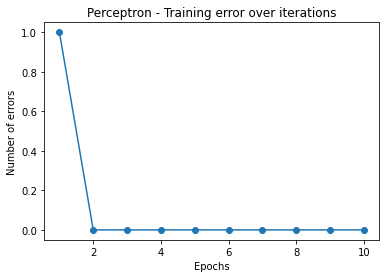

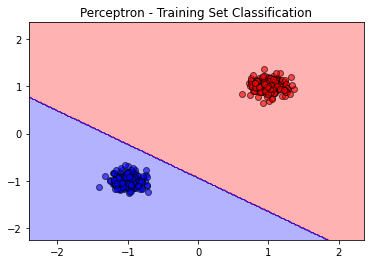

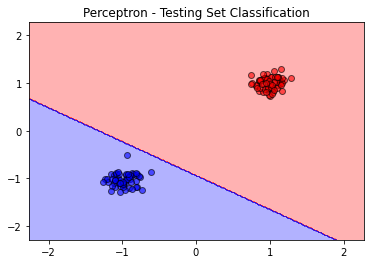

In [9]:
# Plot the training errors with steps
plt.plot(range(1, len(ptron._fit_errors) + 1), ptron._fit_errors, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.title('Perceptron - Training error over iterations')

# Plot the decision boundary and test/training sets
plt.figure()
plot_decision_regions(X_train,y_train, classifier = ptron)
plt.title('Perceptron - Training Set Classification')

plt.figure()
plot_decision_regions(X_test,y_test, classifier = ptron)
plt.title('Perceptron - Testing Set Classification')

In [10]:
"Logistic Regression classifier"

log_class = DSELinearClassifier(activation = 'Logistic',
                         random_state = seed,
                         learning_rate = 0.1)

# For logistic regression, we adjusts the class labels to be 0 and 1
y_train_log = (y_train + 1) / 2
y_test_log =  (y_test + 1) / 2

# Fit the model
log_class.fit(X_train,y_train_log)

In [11]:
# Training Classification Report
print(classification_report(y_train_log,log_class.predict(X_train)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       183
         1.0       1.00      1.00      1.00       192

    accuracy                           1.00       375
   macro avg       1.00      1.00      1.00       375
weighted avg       1.00      1.00      1.00       375



In [12]:
# Testing Classification report
print(classification_report(y_test_log,log_class.predict(X_test)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        67
         1.0       1.00      1.00      1.00        58

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



Text(0.5, 1.0, 'LogReg - Testing Set Classification')

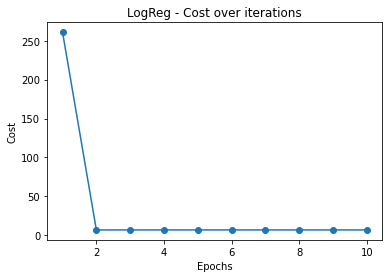

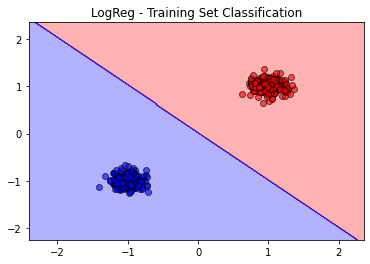

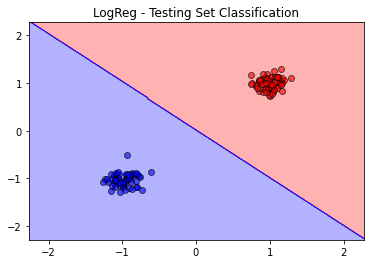

In [13]:
# Plot the training cost with steps
plt.plot(range(1, len(log_class._fit_errors) + 1),
         log_class._fit_errors, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('LogReg - Cost over iterations')

# Plot the decision boundary and test/training sets
plt.figure()
plot_decision_regions(X_train,y_train_log, classifier = log_class)
plt.title('LogReg - Training Set Classification')

plt.figure()
plot_decision_regions(X_test,y_test_log, classifier = log_class)
plt.title('LogReg - Testing Set Classification')

In [14]:
"Hyperbolic Tangent Classification"

tanh_class = DSELinearClassifier(activation = 'Hypertan',
                         random_state = seed,
                         learning_rate = 0.1)

# Fit the model
tanh_class.fit(X_train,y_train)

In [15]:
# Training Classification Report
print(classification_report(y_train,tanh_class.predict(X_train)))

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       183
         1.0       1.00      1.00      1.00       192

    accuracy                           1.00       375
   macro avg       1.00      1.00      1.00       375
weighted avg       1.00      1.00      1.00       375



In [16]:
# Testing Classification report
print(classification_report(y_test,tanh_class.predict(X_test)))

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00        67
         1.0       1.00      1.00      1.00        58

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



Text(0.5, 1.0, 'Hypertan - Testing Set Classification')

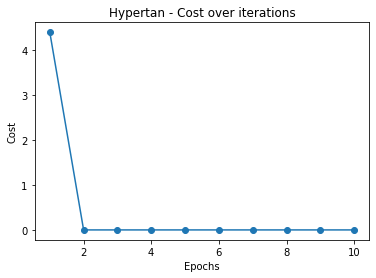

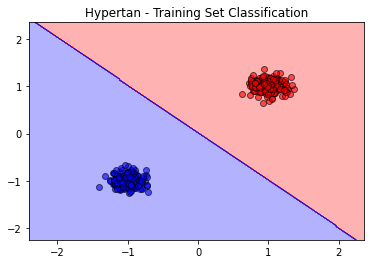

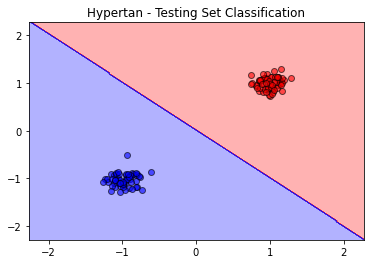

In [17]:
# Plot the training cost with steps
plt.plot(range(1, len(tanh_class._fit_errors) + 1),
         tanh_class._fit_errors, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Hypertan - Cost over iterations')

# Plot the decision boundary and test/training sets
plt.figure()
plot_decision_regions(X_train,y_train, classifier = tanh_class)
plt.title('Hypertan - Training Set Classification')

plt.figure()
plot_decision_regions(X_test,y_test, classifier = tanh_class)
plt.title('Hypertan - Testing Set Classification')

In [18]:
"""Applying linear classifiers on two poorly separated bolbs"""

"Perceptron linear classifier"

# Split data and class
y = df_poor.iloc[0:np.size(df_poor,0),2].values
X = df_poor.iloc[0:np.size(df_poor,0),[0,1]].values

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Fit the model
ptron.fit(X_train,y_train)

In [19]:
# Training Classification Report
print(classification_report(y_train,ptron.predict(X_train)))

              precision    recall  f1-score   support

        -1.0       0.64      0.63      0.64       183
         1.0       0.66      0.67      0.66       192

    accuracy                           0.65       375
   macro avg       0.65      0.65      0.65       375
weighted avg       0.65      0.65      0.65       375



In [20]:
# Training Classification Report
print(classification_report(y_test,ptron.predict(X_test)))

              precision    recall  f1-score   support

        -1.0       0.67      0.58      0.62        67
         1.0       0.58      0.67      0.62        58

    accuracy                           0.62       125
   macro avg       0.63      0.63      0.62       125
weighted avg       0.63      0.62      0.62       125



Text(0.5, 1.0, 'Perceptron - Testing Set Classification')

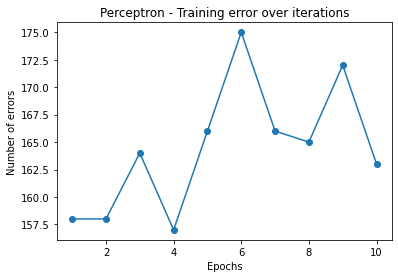

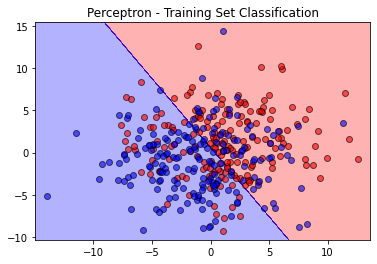

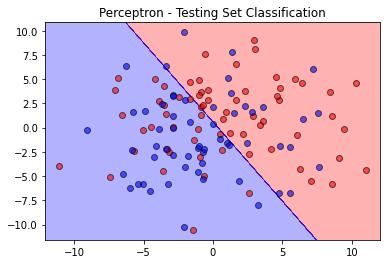

In [21]:
# Plot the training errors with steps
plt.plot(range(1, len(ptron._fit_errors) + 1), ptron._fit_errors, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.title('Perceptron - Training error over iterations')

# Plot the decision boundary and test/training sets
plt.figure()
plot_decision_regions(X_train,y_train, classifier = ptron)
plt.title('Perceptron - Training Set Classification')

plt.figure()
plot_decision_regions(X_test,y_test, classifier = ptron)
plt.title('Perceptron - Testing Set Classification')

In [22]:
"Logistic Regression classifier"

# For logistic regression, we adjusts the class labels to be 0 and 1
y_train_log = (y_train + 1) / 2
y_test_log =  (y_test + 1) / 2

# Fit the model
log_class.fit(X_train,y_train_log)

In [23]:
# Training Classification Report
print(classification_report(y_train_log,log_class.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.64      0.64      0.64       183
         1.0       0.66      0.65      0.65       192

    accuracy                           0.65       375
   macro avg       0.65      0.65      0.65       375
weighted avg       0.65      0.65      0.65       375



In [24]:
# Testing Classification report
print(classification_report(y_test_log,log_class.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.66      0.64      0.65        67
         1.0       0.60      0.62      0.61        58

    accuracy                           0.63       125
   macro avg       0.63      0.63      0.63       125
weighted avg       0.63      0.63      0.63       125



Text(0.5, 1.0, 'LogReg - Testing Set Classification')

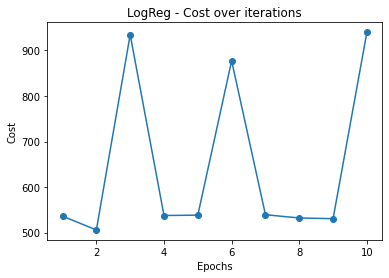

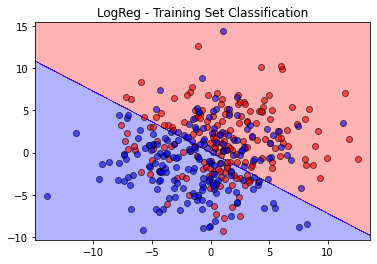

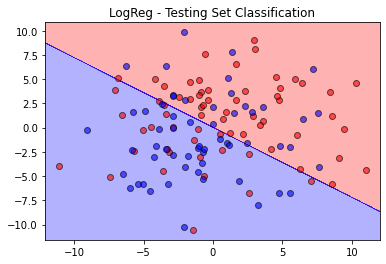

In [25]:
# Plot the training cost with steps
plt.plot(range(1, len(log_class._fit_errors) + 1),
         log_class._fit_errors, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('LogReg - Cost over iterations')

# Plot the decision boundary and test/training sets
plt.figure()
plot_decision_regions(X_train,y_train_log, classifier = log_class)
plt.title('LogReg - Training Set Classification')

plt.figure()
plot_decision_regions(X_test,y_test_log, classifier = log_class)
plt.title('LogReg - Testing Set Classification')

In [26]:
"Hyperbolic Tangent Classification"

# Fit the model
tanh_class.fit(X_train,y_train)

In [27]:
# Training Classification Report
print(classification_report(y_train,tanh_class.predict(X_train)))

              precision    recall  f1-score   support

        -1.0       0.63      0.63      0.63       183
         1.0       0.65      0.65      0.65       192

    accuracy                           0.64       375
   macro avg       0.64      0.64      0.64       375
weighted avg       0.64      0.64      0.64       375



In [28]:
# Testing Classification report
print(classification_report(y_test,tanh_class.predict(X_test)))

              precision    recall  f1-score   support

        -1.0       0.66      0.64      0.65        67
         1.0       0.60      0.62      0.61        58

    accuracy                           0.63       125
   macro avg       0.63      0.63      0.63       125
weighted avg       0.63      0.63      0.63       125



Text(0.5, 1.0, 'Hypertan - Testing Set Classification')

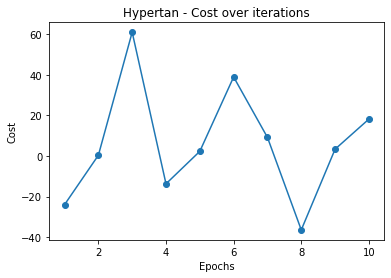

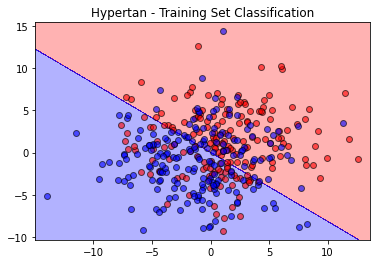

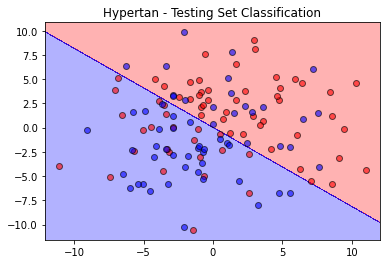

In [29]:
# Plot the training cost with steps
plt.plot(range(1, len(tanh_class._fit_errors) + 1),
         tanh_class._fit_errors, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Hypertan - Cost over iterations')

# Plot the decision boundary and test/training sets
plt.figure()
plot_decision_regions(X_train,y_train, classifier = tanh_class)
plt.title('Hypertan - Training Set Classification')

plt.figure()
plot_decision_regions(X_test,y_test, classifier = tanh_class)
plt.title('Hypertan - Testing Set Classification')

In [30]:
"""Applying linear classifiers on concentric data groups"""

"Perceptron linear classifier"

# Split data and class
y = df_circle.iloc[0:np.size(df_circle,0),2].values
X = df_circle.iloc[0:np.size(df_circle,0),[0,1]].values

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Fit the model
ptron.fit(X_train,y_train)

In [31]:
# Training Classification Report
print(classification_report(y_train,ptron.predict(X_train)))

              precision    recall  f1-score   support

        -1.0       0.48      0.97      0.64       367
         1.0       0.00      0.00      0.00       383

    accuracy                           0.47       750
   macro avg       0.24      0.49      0.32       750
weighted avg       0.24      0.47      0.32       750



In [32]:
# Training Classification Report
print(classification_report(y_test,ptron.predict(X_test)))

              precision    recall  f1-score   support

        -1.0       0.52      0.97      0.68       133
         1.0       0.00      0.00      0.00       117

    accuracy                           0.52       250
   macro avg       0.26      0.48      0.34       250
weighted avg       0.28      0.52      0.36       250



Text(0.5, 1.0, 'Perceptron - Testing Set Classification')

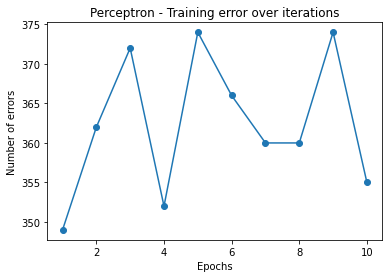

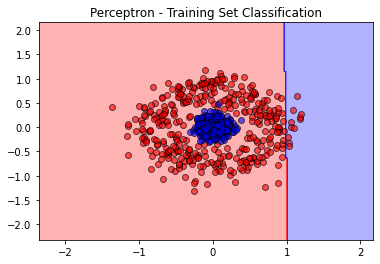

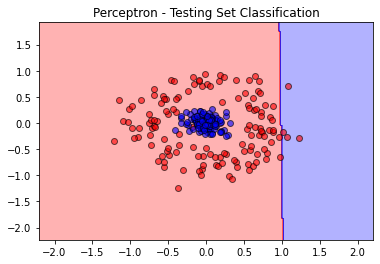

In [33]:
# Plot the training errors with steps
plt.plot(range(1, len(ptron._fit_errors) + 1), ptron._fit_errors, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.title('Perceptron - Training error over iterations')

# Plot the decision boundary and test/training sets
plt.figure()
plot_decision_regions(X_train,y_train, classifier = ptron)
plt.title('Perceptron - Training Set Classification')

plt.figure()
plot_decision_regions(X_test,y_test, classifier = ptron)
plt.title('Perceptron - Testing Set Classification')

In [34]:
"Logistic Regression classifier"

# For logistic regression, we adjusts the class labels to be 0 and 1
y_train_log = (y_train + 1) / 2
y_test_log =  (y_test + 1) / 2

# Fit the model
log_class.fit(X_train,y_train_log)

In [35]:
# Training Classification Report
print(classification_report(y_train_log,log_class.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       367
         1.0       0.51      1.00      0.68       383

    accuracy                           0.51       750
   macro avg       0.26      0.50      0.34       750
weighted avg       0.26      0.51      0.35       750



C:\Users\rodri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
# Testing Classification report
print(classification_report(y_test_log,log_class.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       133
         1.0       0.47      1.00      0.64       117

    accuracy                           0.47       250
   macro avg       0.23      0.50      0.32       250
weighted avg       0.22      0.47      0.30       250



Text(0.5, 1.0, 'LogReg - Testing Set Classification')

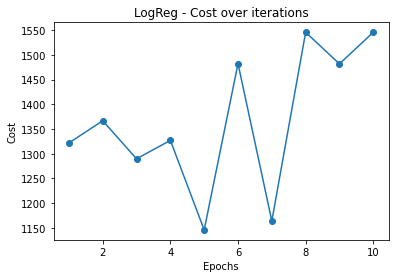

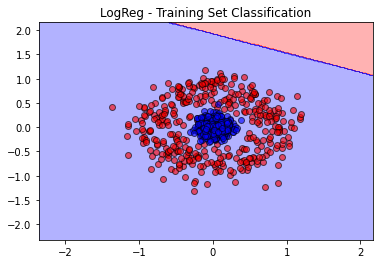

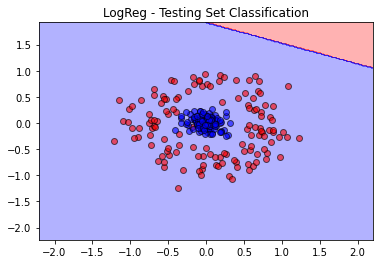

In [37]:
# Plot the training cost with steps
plt.plot(range(1, len(log_class._fit_errors) + 1),
         log_class._fit_errors, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('LogReg - Cost over iterations')

# Plot the decision boundary and test/training sets
plt.figure()
plot_decision_regions(X_train,y_train_log, classifier = log_class)
plt.title('LogReg - Training Set Classification')

plt.figure()
plot_decision_regions(X_test,y_test_log, classifier = log_class)
plt.title('LogReg - Testing Set Classification')

In [38]:
"Hyperbolic Tangent Classification"

# Fit the model
tanh_class.fit(X_train,y_train)

In [39]:
# Training Classification Report
print(classification_report(y_train,tanh_class.predict(X_train)))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       367
         1.0       0.51      1.00      0.68       383

    accuracy                           0.51       750
   macro avg       0.26      0.50      0.34       750
weighted avg       0.26      0.51      0.35       750



In [40]:
# Testing Classification report
print(classification_report(y_test,tanh_class.predict(X_test)))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       133
         1.0       0.47      1.00      0.64       117

    accuracy                           0.47       250
   macro avg       0.23      0.50      0.32       250
weighted avg       0.22      0.47      0.30       250



Text(0.5, 1.0, 'Hypertan - Testing Set Classification')

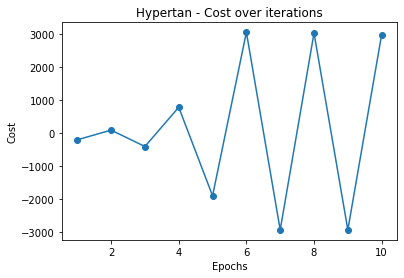

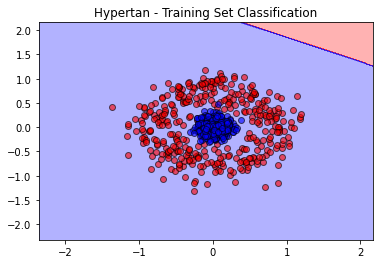

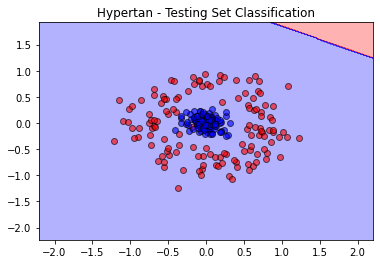

In [41]:
# Plot the training cost with steps
plt.plot(range(1, len(tanh_class._fit_errors) + 1),
         tanh_class._fit_errors, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Hypertan - Cost over iterations')

# Plot the decision boundary and test/training sets
plt.figure()
plot_decision_regions(X_train,y_train, classifier = tanh_class)
plt.title('Hypertan - Training Set Classification')

plt.figure()
plot_decision_regions(X_test,y_test, classifier = tanh_class)
plt.title('Hypertan - Testing Set Classification')

In [42]:
"""Changing the learning rate on well separated data"""

# Learning rates
l_rates = (0.2,0.4,0.8)

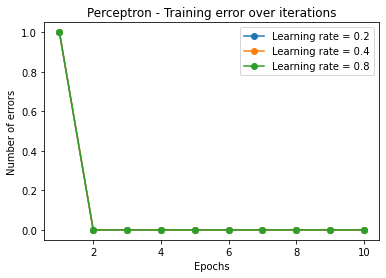

In [43]:
'Perceptron'
# Split data and class
y = df_sep.iloc[0:np.size(df_sep,0),2].values
X = df_sep.iloc[0:np.size(df_sep,0),[0,1]].values

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y)

for i in l_rates:

    ptron = DSELinearClassifier(activation = 'Perceptron',
                             random_state = seed,
                             learning_rate = i)
    # Fit the model
    ptron.fit(X_train,y_train)

    # Plot the training errors with steps
    plt.plot(range(1, len(ptron._fit_errors) + 1), ptron._fit_errors, marker='o')


plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.title('Perceptron - Training error over iterations')
plt.legend(('Learning rate = ' + str(l_rates[0]),
           'Learning rate = ' + str(l_rates[1]),
           'Learning rate = ' + str(l_rates[2])))

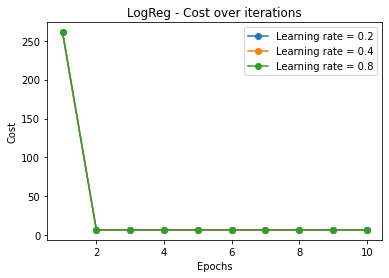

In [44]:
'Logistic Regression'

# For logistic regression, we adjusts the class labels to be 0 and 1
y_train_log = (y_train + 1) / 2
y_test_log =  (y_test + 1) / 2

for i in l_rates:

    log_class = DSELinearClassifier(activation = 'Logistic',
                                    random_state = seed,
                                    learning_rate = i)
    # Fit the model
    log_class.fit(X_train,y_train_log)

    # Plot the training errors with steps
    plt.plot(range(1, len(log_class._fit_errors) + 1),
             log_class._fit_errors, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('LogReg - Cost over iterations')
plt.legend(('Learning rate = ' + str(l_rates[0]),
           'Learning rate = ' + str(l_rates[1]),
           'Learning rate = ' + str(l_rates[2])))

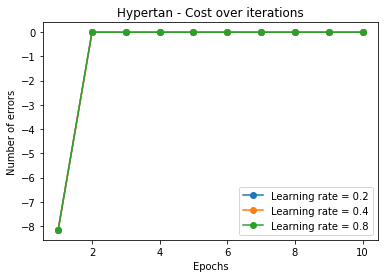

In [45]:
'Hyperbolic Tangent Classifier'

for i in l_rates:

    tanh_class = DSELinearClassifier(activation = 'Hypertan',
                                     random_state = seed,
                                     learning_rate = i)
    # Fit the model
    tanh_class.fit(X_train,y_train)

    # Plot the training errors with steps
    plt.plot(range(1, len(tanh_class._fit_errors) + 1),
             tanh_class._fit_errors, marker='o')


plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.title('Hypertan - Cost over iterations')
plt.legend(('Learning rate = ' + str(l_rates[0]),
           'Learning rate = ' + str(l_rates[1]),
           'Learning rate = ' + str(l_rates[2])))

In [46]:
"""Changing the learning rate on poorly separated data"""

'Changing the learning rate on poorly separated data'

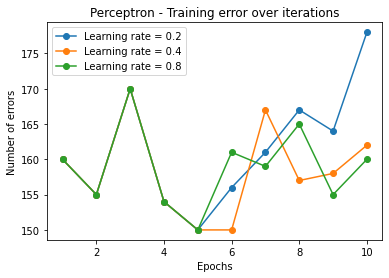

In [47]:
'Perceptron'
# Split data and class
y = df_poor.iloc[0:np.size(df_poor,0),2].values
X = df_poor.iloc[0:np.size(df_poor,0),[0,1]].values

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y)

for i in l_rates:

    ptron = DSELinearClassifier(activation = 'Perceptron',
                             random_state = seed,
                             learning_rate = i)
    # Fit the model
    ptron.fit(X_train,y_train)

    # Plot the training errors with steps
    plt.plot(range(1, len(ptron._fit_errors) + 1), ptron._fit_errors, marker='o')


plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.title('Perceptron - Training error over iterations')
plt.legend(('Learning rate = ' + str(l_rates[0]),
           'Learning rate = ' + str(l_rates[1]),
           'Learning rate = ' + str(l_rates[2])))

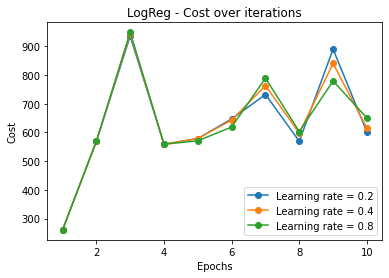

In [48]:
'Logistic Regression'

# For logistic regression, we adjusts the class labels to be 0 and 1
y_train_log = (y_train + 1) / 2
y_test_log =  (y_test + 1) / 2

for i in l_rates:

    log_class = DSELinearClassifier(activation = 'Logistic',
                                    random_state = seed,
                                    learning_rate = i)
    # Fit the model
    log_class.fit(X_train,y_train_log)

    # Plot the training errors with steps
    plt.plot(range(1, len(log_class._fit_errors) + 1),
             log_class._fit_errors, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('LogReg - Cost over iterations')
plt.legend(('Learning rate = ' + str(l_rates[0]),
           'Learning rate = ' + str(l_rates[1]),
           'Learning rate = ' + str(l_rates[2])))

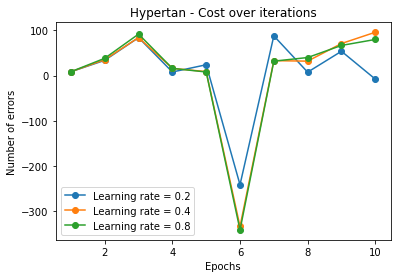

In [49]:
'Hyperbolic Tangent Classifier'

for i in l_rates:

    tanh_class = DSELinearClassifier(activation = 'Hypertan',
                                     random_state = seed,
                                     learning_rate = i)
    # Fit the model
    tanh_class.fit(X_train,y_train)

    # Plot the training errors with steps
    plt.plot(range(1, len(tanh_class._fit_errors) + 1),
             tanh_class._fit_errors, marker='o')


plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.title('Hypertan - Cost over iterations')
plt.legend(('Learning rate = ' + str(l_rates[0]),
           'Learning rate = ' + str(l_rates[1]),
           'Learning rate = ' + str(l_rates[2])))

In [50]:
"""Changing the learning rate on concentric data"""

'Changing the learning rate on concentric data'

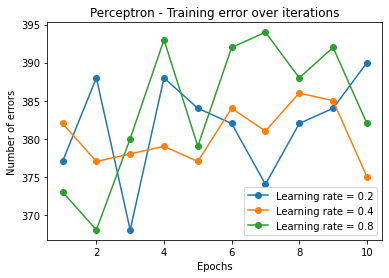

In [51]:
'Perceptron'
# Split data and class
y = df_circle.iloc[0:np.size(df_circle,0),2].values
X = df_circle.iloc[0:np.size(df_circle,0),[0,1]].values

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y)

for i in l_rates:

    ptron = DSELinearClassifier(activation = 'Perceptron',
                             random_state = seed,
                             learning_rate = i)
    # Fit the model
    ptron.fit(X_train,y_train)

    # Plot the training errors with steps
    plt.plot(range(1, len(ptron._fit_errors) + 1), ptron._fit_errors, marker='o')


plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.title('Perceptron - Training error over iterations')
plt.legend(('Learning rate = ' + str(l_rates[0]),
           'Learning rate = ' + str(l_rates[1]),
           'Learning rate = ' + str(l_rates[2])))

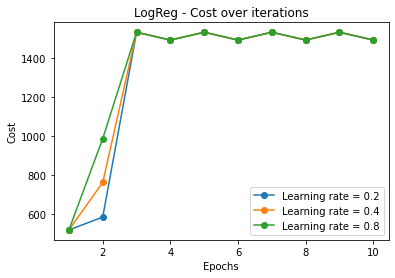

In [52]:
'Logistic Regression'

# For logistic regression, we adjusts the class labels to be 0 and 1
y_train_log = (y_train + 1) / 2
y_test_log =  (y_test + 1) / 2

for i in l_rates:

    log_class = DSELinearClassifier(activation = 'Logistic',
                                    random_state = seed,
                                    learning_rate = i)
    # Fit the model
    log_class.fit(X_train,y_train_log)

    # Plot the training errors with steps
    plt.plot(range(1, len(log_class._fit_errors) + 1),
             log_class._fit_errors, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('LogReg - Cost over iterations')
plt.legend(('Learning rate = ' + str(l_rates[0]),
           'Learning rate = ' + str(l_rates[1]),
           'Learning rate = ' + str(l_rates[2])))

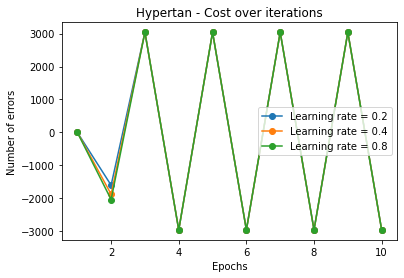

In [53]:
'Hyperbolic Tangent Classifier'

for i in l_rates:

    tanh_class = DSELinearClassifier(activation = 'Hypertan',
                                     random_state = seed,
                                     learning_rate = i)
    # Fit the model
    tanh_class.fit(X_train,y_train)

    # Plot the training errors with steps
    plt.plot(range(1, len(tanh_class._fit_errors) + 1),
             tanh_class._fit_errors, marker='o')


plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.title('Hypertan - Cost over iterations')
plt.legend(('Learning rate = ' + str(l_rates[0]),
           'Learning rate = ' + str(l_rates[1]),
           'Learning rate = ' + str(l_rates[2])))

In [54]:
"""Test the algorithms with initial weights"""

'Test the algorithms with initial weights'

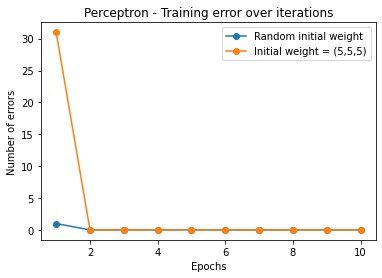

In [55]:
'Perceptron'
# Split data and class
y = df_sep.iloc[0:np.size(df_sep,0),2].values
X = df_sep.iloc[0:np.size(df_sep,0),[0,1]].values

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y)

ptron = DSELinearClassifier(activation = 'Perceptron',
                            random_state = seed,
                            learning_rate = 0.1)
# Fit the model with random weights
ptron.fit(X_train,y_train)

# Plot the training errors with steps
plt.plot(range(1, len(ptron._fit_errors) + 1), ptron._fit_errors, marker='o')

ptron = DSELinearClassifier(activation = 'Perceptron',
                            random_state = seed,
                            initial_weight = np.array([5.,5.,5.]),
                            learning_rate = 0.1)
# Fit the model with set weights
ptron.fit(X_train,y_train)

# Plot the training errors with steps
plt.plot(range(1, len(ptron._fit_errors) + 1), ptron._fit_errors, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.title('Perceptron - Training error over iterations')
plt.legend(('Random initial weight','Initial weight = (5,5,5)'))

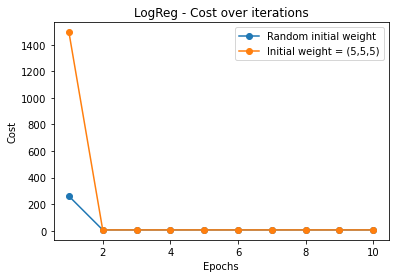

In [56]:
'Logistic Regression'

# For logistic regression, we adjusts the class labels to be 0 and 1
y_train_log = (y_train + 1) / 2
y_test_log =  (y_test + 1) / 2

log_class = DSELinearClassifier(activation = 'Logistic',
                                random_state = seed,
                                learning_rate = i)
# Fit the model with random weights
log_class.fit(X_train,y_train_log)

# Plot the training errors with steps
plt.plot(range(1, len(log_class._fit_errors) + 1),
        log_class._fit_errors, marker='o')

log_class = DSELinearClassifier(activation = 'Logistic',
                                random_state = seed,
                                initial_weight = np.array([5.,5.,5.]),
                                learning_rate = i)
# Fit the model  with set weights
log_class.fit(X_train,y_train_log)

# Plot the training errors with steps
plt.plot(range(1, len(log_class._fit_errors) + 1),
        log_class._fit_errors, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('LogReg - Cost over iterations')
plt.legend(('Random initial weight','Initial weight = (5,5,5)'))

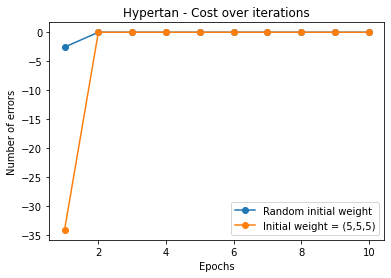

In [57]:
'Hyperbolic Tangent Classifier'

tanh_class = DSELinearClassifier(activation = 'Hypertan',
                                random_state = seed,
                                learning_rate = i)
# Fit the model with randpm weights
tanh_class.fit(X_train,y_train)

# Plot the training errors with steps
plt.plot(range(1, len(tanh_class._fit_errors) + 1),
        tanh_class._fit_errors, marker='o')

tanh_class = DSELinearClassifier(activation = 'Hypertan',
                                random_state = seed,
                                initial_weight = np.array([5.,5.,5.]),
                                learning_rate = i)
# Fit the model with set weights
tanh_class.fit(X_train,y_train)

# Plot the training errors with steps
plt.plot(range(1, len(tanh_class._fit_errors) + 1),
        tanh_class._fit_errors, marker='o')


plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.title('Hypertan - Cost over iterations')
plt.legend(('Random initial weight','Initial weight = (5,5,5)'))

In [ ]:
"""As we can see from the above three plots, we conclude that randomized weights
have an advantage to arbitrarily chosen weights (the error/cost starts smaller
with randomly chosen weights. """